In [8]:
!pip install pytrends


Enter a keyword to analyze: royal enfield


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Trend data found ✅

                     royal enfield  isPartial
date                                         
2025-08-05 08:00:00             74      False
2025-08-05 09:00:00             69      False
2025-08-05 10:00:00             64      False
2025-08-05 11:00:00             70      False
2025-08-05 12:00:00             70       True


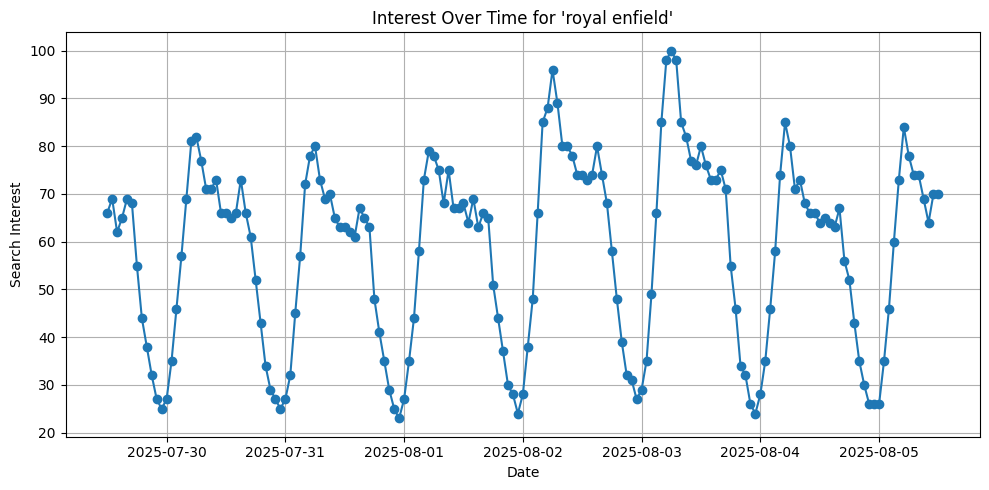


✅ CSV saved as royal enfield_trend.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 🔍 Ask for input
keyword = input("Enter a keyword to analyze: ")

# 🛰 Connect to Google Trends
pytrends = TrendReq(hl='en-US', tz=330)
pytrends.build_payload([keyword], cat=0, timeframe='now 7-d', geo='', gprop='')

# 📊 Get trend data
data = pytrends.interest_over_time()

# ✅ If data found
if not data.empty:
    print("Trend data found ✅\n")
    print(data.tail())

    # 📈 Plot
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data[keyword], marker='o')
    plt.title(f"Interest Over Time for '{keyword}'")
    plt.xlabel("Date")
    plt.ylabel("Search Interest")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{keyword}_trend.png")
    plt.show()

    # 💾 Save CSV
    data[[keyword]].to_csv(f"{keyword}_trend.csv")
    print(f"\n✅ CSV saved as {keyword}_trend.csv")

    # 📥 Download Files
    files.download(f"{keyword}_trend.csv")
    files.download(f"{keyword}_trend.png")

else:
    print("❌ No data found for the given keyword.")

